In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

#import simulate_data.simulate_data as sd

In [126]:
q_list = [0.25,0.5,0.75,0.9,0.99]

In [145]:
def pooled_standard_deviation(y_obs, W):
    V1 = np.var(y_obs[W==1])
    V0 = np.var(y_obs[W==0]) 
    pooled_standard_deviation = np.sqrt(
        ((np.sum(W) - 1)*V1 + (np.sum(1-W)-1)*V0) / (len(W)-2)
    )
    return pooled_standard_deviation


def get_sigma_b(s_hat, sigma_a, q):
    # prior parameters on sigma

    #print("s_hat = ", s_hat)
    if s_hat >= 1.:
        qval=.1*s_hat
        b = 1
        while qval < s_hat:
            #print("qval < s_hat")
            b*=1.01
            #print("self.sigma_a=", sigma_a)
            #print("b=",b)
            gamma_sample = np.power(np.random.gamma(sigma_a, 1/b, size=1000), -0.5)
            qval = np.quantile(gamma_sample, q=[q])
    else:
        qval=2*s_hat
        b = 3.0
        while qval > s_hat:
            #print("qval > s_hat")
            b/=1.01
            #print("self.sigma_a=", sigma_a)
            #print("b=",b)
            gamma_sample = np.power(np.random.gamma(sigma_a, 1/b, size=1000), -0.5)
            qval = np.quantile(gamma_sample, q=[q])
            
    return b

def plot_prior_range(q_vals, a, Y, W, true_sigma=None):
    for q in q_vals:
        sigma_a = a
        quantile = q
        psd = pooled_standard_deviation(y_obs=Y, W=W)
        sigma_b = get_sigma_b(s_hat = psd, sigma_a = 3, q = quantile)

        IG_prior = np.power(np.random.gamma(sigma_a, 1/sigma_b, size=1000000), -0.5)
        #distributions.append(IG_prior)
        sns.distplot(
            IG_prior, hist = False, kde = True,
            kde_kws = {'linewidth': 2},
            label=(
                "a="+str(sigma_a) + 
                #" - b="+str(round(sigma_b,2)) + 
                " - q="+str(round(quantile,2))
            )
        )
        plt.xlim((-psd*.05,psd*2))
    plt.axvline(x=psd, color='red', label='s-hat')
    
    if true_sigma is not None:
        plt.axvline(x=true_sigma, color='black', label='true sigma')
    _=plt.legend(loc="upper right")
    _=plt.title("IG(a,b) prior")

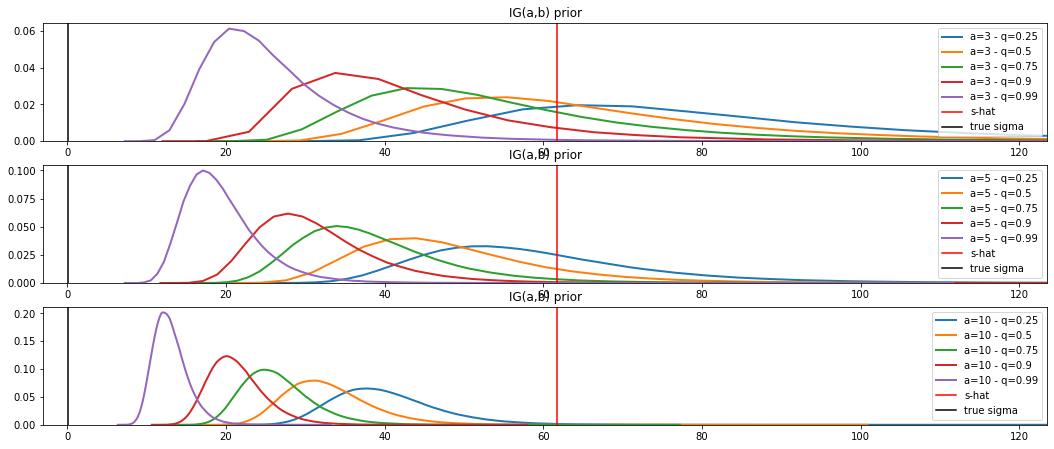

In [146]:
data = pd.read_csv("simulate_data/zaidi_data_A/0/zaidi_data_A_seed=0.csv")
Y = np.array(data.Y)
W = np.array(data.W)
_=plt.figure(figsize=(18,10))
plt.subplot(4,1,2)
plot_prior_range(q_vals=q_list, a=3, Y=Y, W=W, true_sigma=0.01)
plt.subplot(4,1,3)
plot_prior_range(q_vals=q_list, a=5, Y=Y, W=W, true_sigma=0.01)
plt.subplot(4,1,4)
plot_prior_range(q_vals=q_list, a=10, Y=Y, W=W, true_sigma=0.01)

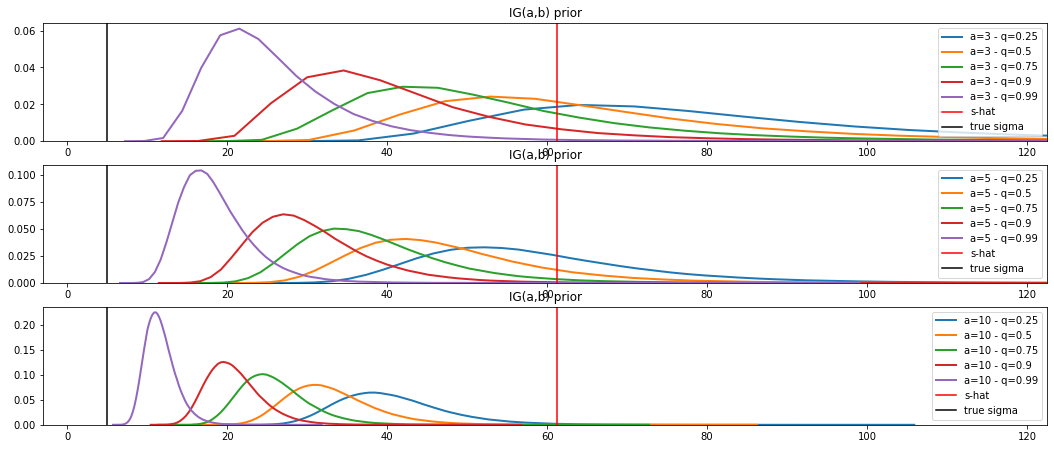

In [147]:
data = pd.read_csv("simulate_data/zaidi_data_A_var=25/0/zaidi_data_A_seed=0.csv")
Y = np.array(data.Y)
W = np.array(data.W)
_=plt.figure(figsize=(18,10))
#plt.subplot(4,1,1)
#plot_prior_range(q_vals=q_list, a=2, Y=Y, W=W)
plt.subplot(4,1,2)
plot_prior_range(q_vals=q_list, a=3, Y=Y, W=W, true_sigma=5)
plt.subplot(4,1,3)
plot_prior_range(q_vals=q_list, a=5, Y=Y, W=W, true_sigma=5)
plt.subplot(4,1,4)
plot_prior_range(q_vals=q_list, a=10, Y=Y, W=W, true_sigma=5)

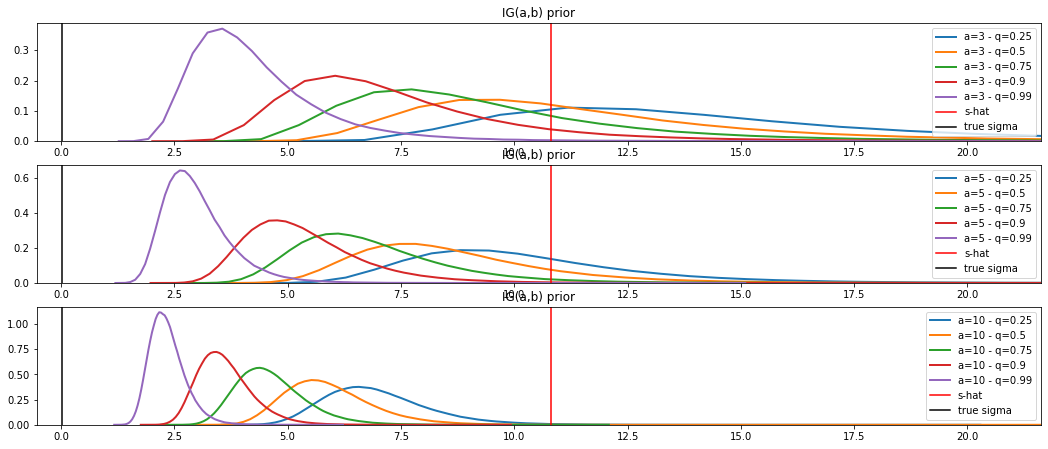

In [148]:
data = pd.read_csv("simulate_data/zaidi_data_B/zaidi_data_B_seed=0.csv")
Y = np.array(data.Y)
W = np.array(data.W)
_=plt.figure(figsize=(18,10))
#plt.subplot(4,1,1)
#plot_prior_range(q_vals=q_list, a=2, Y=Y, W=W)
plt.subplot(4,1,2)
plot_prior_range(q_vals=q_list, a=3, Y=Y, W=W, true_sigma=0.01)
plt.subplot(4,1,3)
plot_prior_range(q_vals=q_list, a=5, Y=Y, W=W, true_sigma=0.01)
plt.subplot(4,1,4)
plot_prior_range(q_vals=q_list, a=10, Y=Y, W=W, true_sigma=0.01)

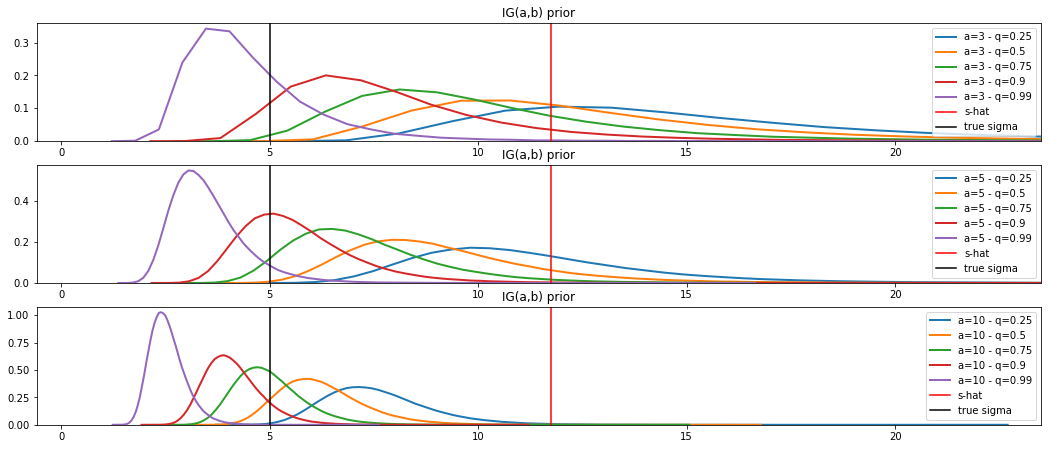

In [149]:
data = pd.read_csv("simulate_data/zaidi_data_B_var=25/zaidi_data_B_seed=0.csv")
Y = np.array(data.Y)
W = np.array(data.W)
_=plt.figure(figsize=(18,10))
#plt.subplot(4,1,1)
#plot_prior_range(q_vals=q_list, a=2, Y=Y, W=W)
plt.subplot(4,1,2)
plot_prior_range(q_vals=q_list, a=3, Y=Y, W=W, true_sigma=5)
plt.subplot(4,1,3)
plot_prior_range(q_vals=q_list, a=5, Y=Y, W=W, true_sigma=5)
plt.subplot(4,1,4)
plot_prior_range(q_vals=q_list, a=10, Y=Y, W=W, true_sigma=5)

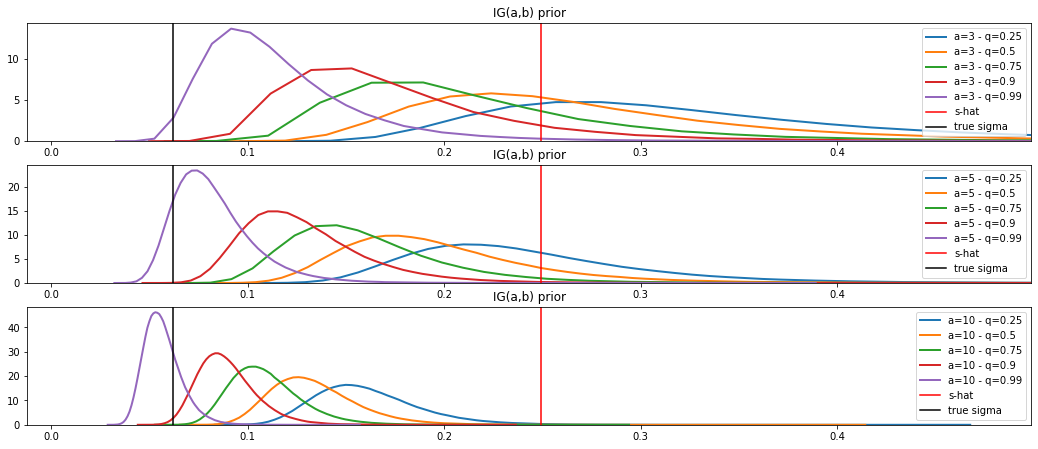

In [150]:
si=0.01
data = pd.read_csv(f"simulate_data/CMM_data_C_var_percent={si}/CMM_data_C_seed=0.csv")
Y = np.array(data.Y)
W = np.array(data.W)
true_s = data.sig[0]
_=plt.figure(figsize=(18,10))
#plt.subplot(4,1,1)
#plot_prior_range(q_vals=q_list, a=2, Y=Y, W=W)
plt.subplot(4,1,2)
plot_prior_range(q_vals=q_list, a=3, Y=Y, W=W, true_sigma=true_s)
plt.subplot(4,1,3)
plot_prior_range(q_vals=q_list, a=5, Y=Y, W=W, true_sigma=true_s)
plt.subplot(4,1,4)
plot_prior_range(q_vals=q_list, a=10, Y=Y, W=W, true_sigma=true_s)

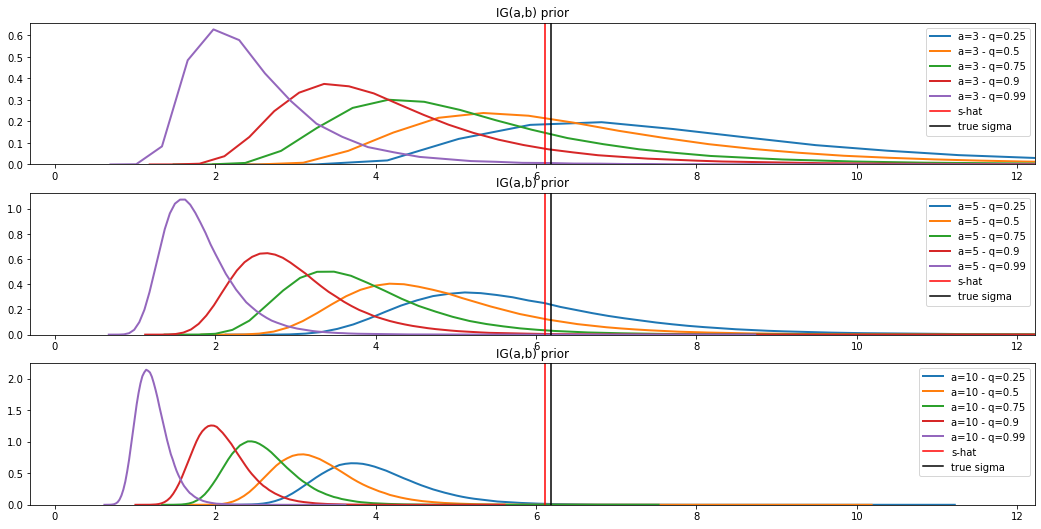

In [151]:
si=100.0
data = pd.read_csv(f"simulate_data/CMM_data_C_var_percent={si}/CMM_data_C_seed=0.csv")
Y = np.array(data.Y)
W = np.array(data.W)
true_s = data.sig[0]
_=plt.figure(figsize=(18,12))
#plt.subplot(4,1,1)
#plot_prior_range(q_vals=q_list, a=2, Y=Y, W=W)
plt.subplot(4,1,2)
plot_prior_range(q_vals=q_list, a=3, Y=Y, W=W, true_sigma=true_s)
plt.subplot(4,1,3)
plot_prior_range(q_vals=q_list, a=5, Y=Y, W=W, true_sigma=true_s)
plt.subplot(4,1,4)
plot_prior_range(q_vals=q_list, a=10, Y=Y, W=W, true_sigma=true_s)
